# Plot Streamflow Forecast Data

Plot hydrographs that show:
- Historical dischange and water levels, translated to observation
- Real time hydrological observations
- Analysis and forecast from the NSRPS


### Import Modules

In [52]:
from pathlib import Path
import pandas as pd
import yaml

import sys
sys.path.append('../scripts')
from plotting import plot_watershed_flowlines_stations
from hydrograph_plotting import plot_detailed_hydrograph

# add autoreload to automatically reload modules when they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read settings from configuration file

In [54]:
config_file = "../settings/general_settings.yaml"

# Read settings from yaml file
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile, Loader=yaml.FullLoader)

# Set variables, this can be replaced by a config file. To be discussed
api_url = config['msc_open_data_settings']['api_url']

# Set up paths 
gis_data_dir = config['paths']['gis_data']
output_base_dir = Path(config['paths']['output_dir'])
output_base_dir.mkdir(parents=True, exist_ok=True)
output_base_dir = output_base_dir.resolve()

# Set up paths to gis data
stations_csv = Path(gis_data_dir, config['gis_data']['hydro_stns_csv'])
nsrps_station_location_csv = Path(gis_data_dir, config['gis_data']['nsrps_stns_csv'])
watershed_shp = Path(gis_data_dir, config['gis_data']['basins_shp'])
flowlines_shp = Path(gis_data_dir, config['gis_data']['flowlines_shp'])

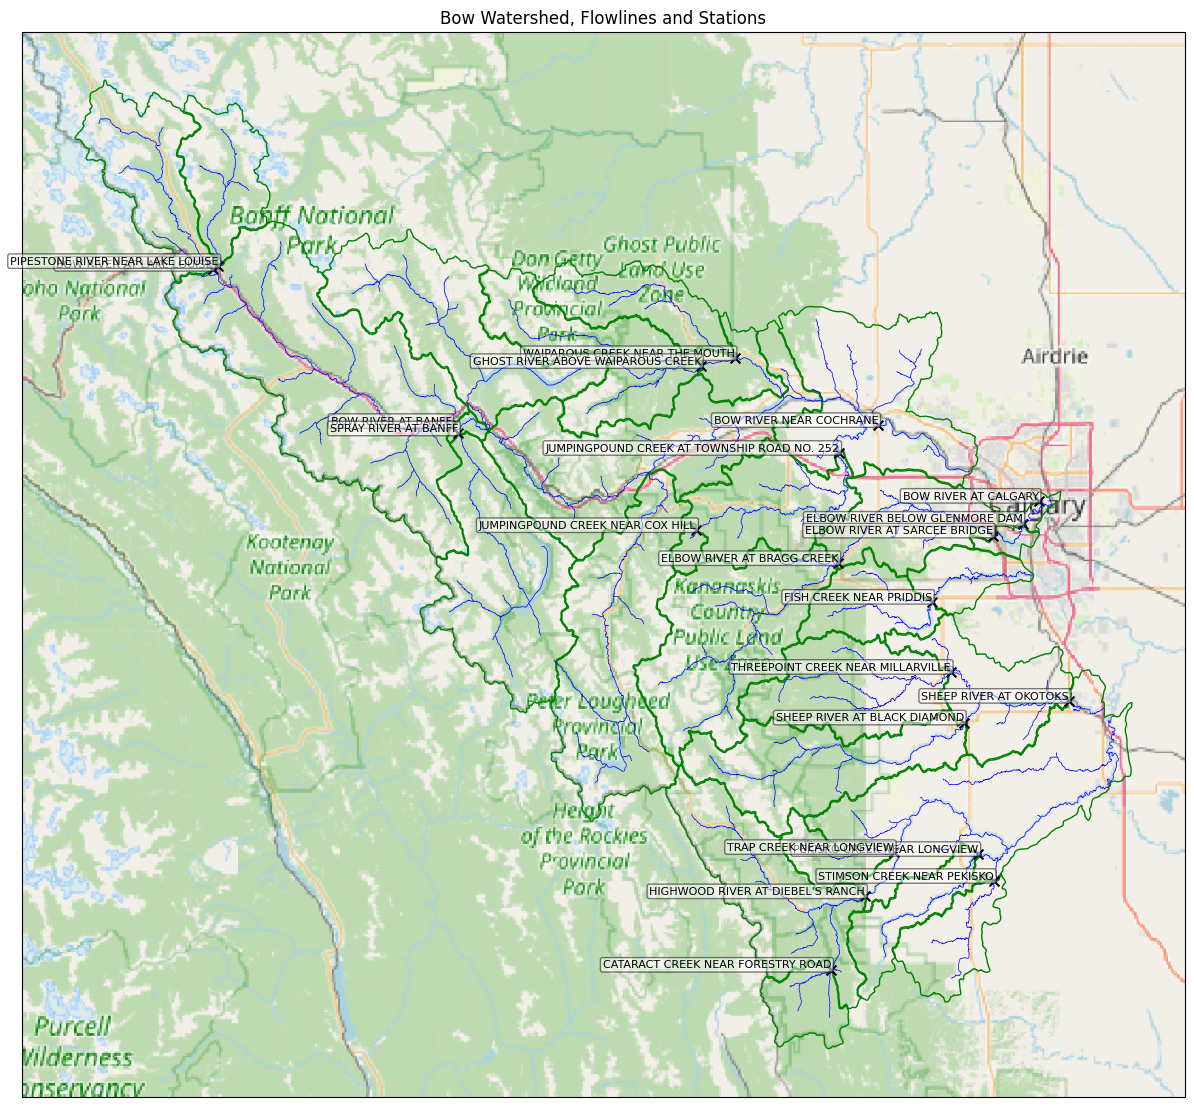

In [55]:
# Read in the list of hydrometric stations
hydro_stations_df = pd.read_csv(stations_csv)
search_stations = hydro_stations_df["ID"].tolist()

# Plot the stations on a map
plot_watershed_flowlines_stations(watershed_shp, flowlines_shp, stations_csv)

### Plot Real Time Measurement, in context of historical range

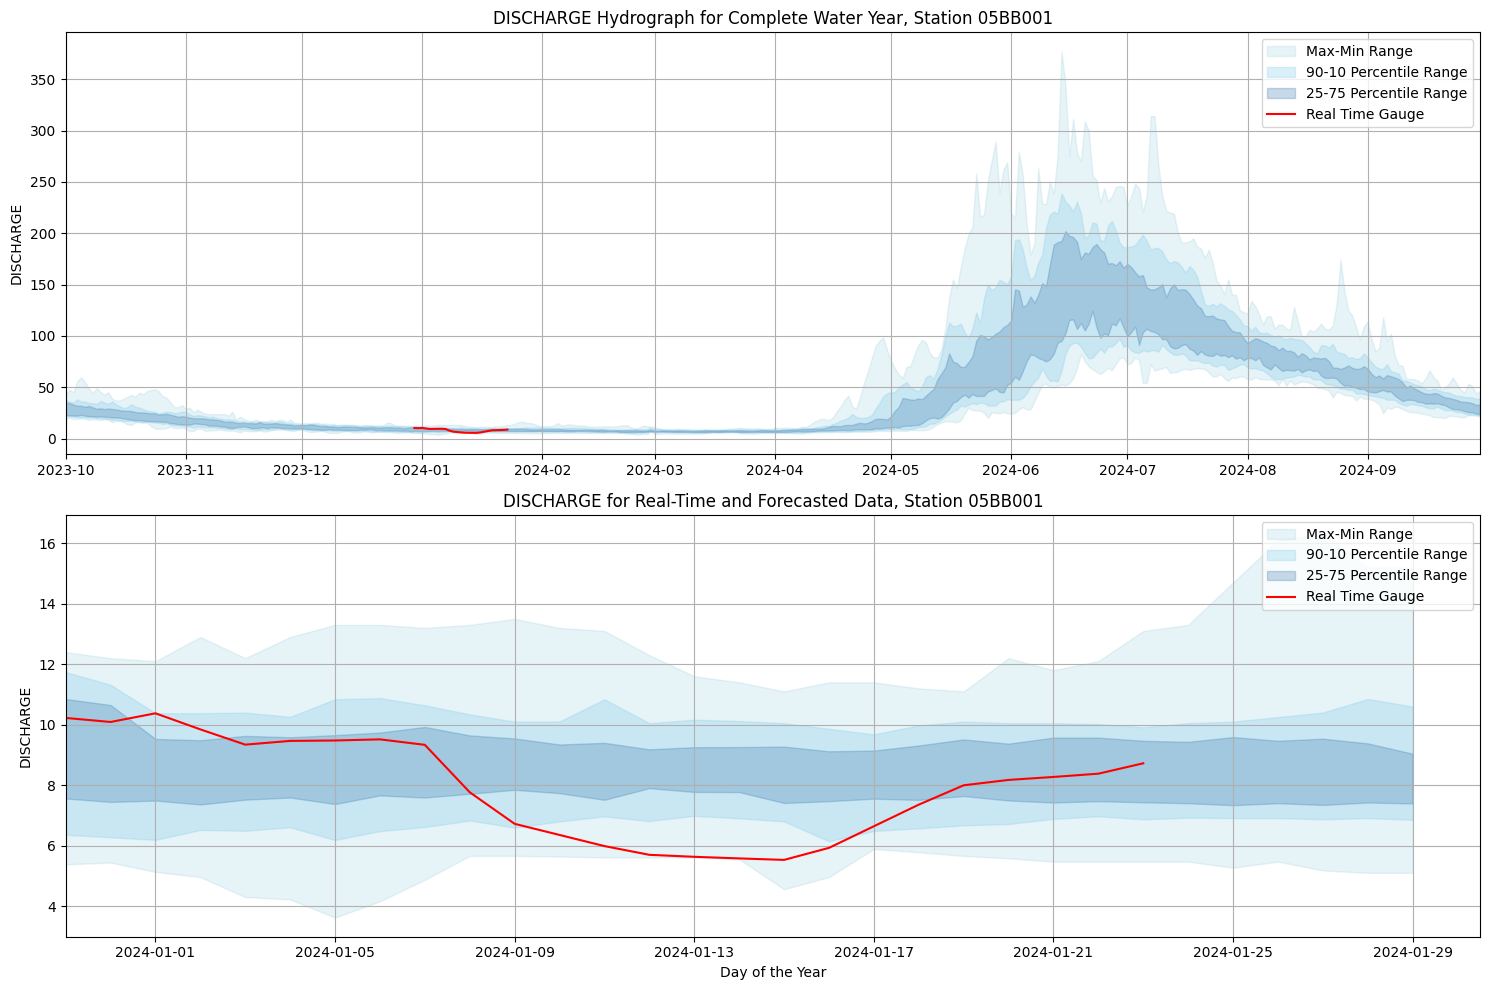

In [44]:
variable = 'DISCHARGE'
station = '05BB001'


historic_df = pd.read_csv(Path(output_base_dir, f'hydrometric-daily-mean/{station}_{variable}.csv'))
realtime_df = pd.read_csv(Path(output_base_dir,f'hydrometric-realtime/{station}_{variable}.csv'))
forecast_df = pd.read_csv(Path(output_base_dir,f'DHPS_1km_RiverDischarge/{station}_forecast.csv'))
analysis_df = pd.read_csv(Path(output_base_dir,f'DHPS-Analysis_1km_RiverDischarge/{station}_analysis.csv'))
threshold_csv = Path(output_base_dir, f'/FFA/{station}_threshold.csv')

if threshold_csv.exists(): 
    threshold_df = pd.read_csv(f'/Users/drc858/GitHub/ForecastFloodImpact/data_output/FFA/{station}_threshold.csv')
else:
    threshold_df=None

plot_detailed_hydrograph(station, variable, historic_df, realtime_df)


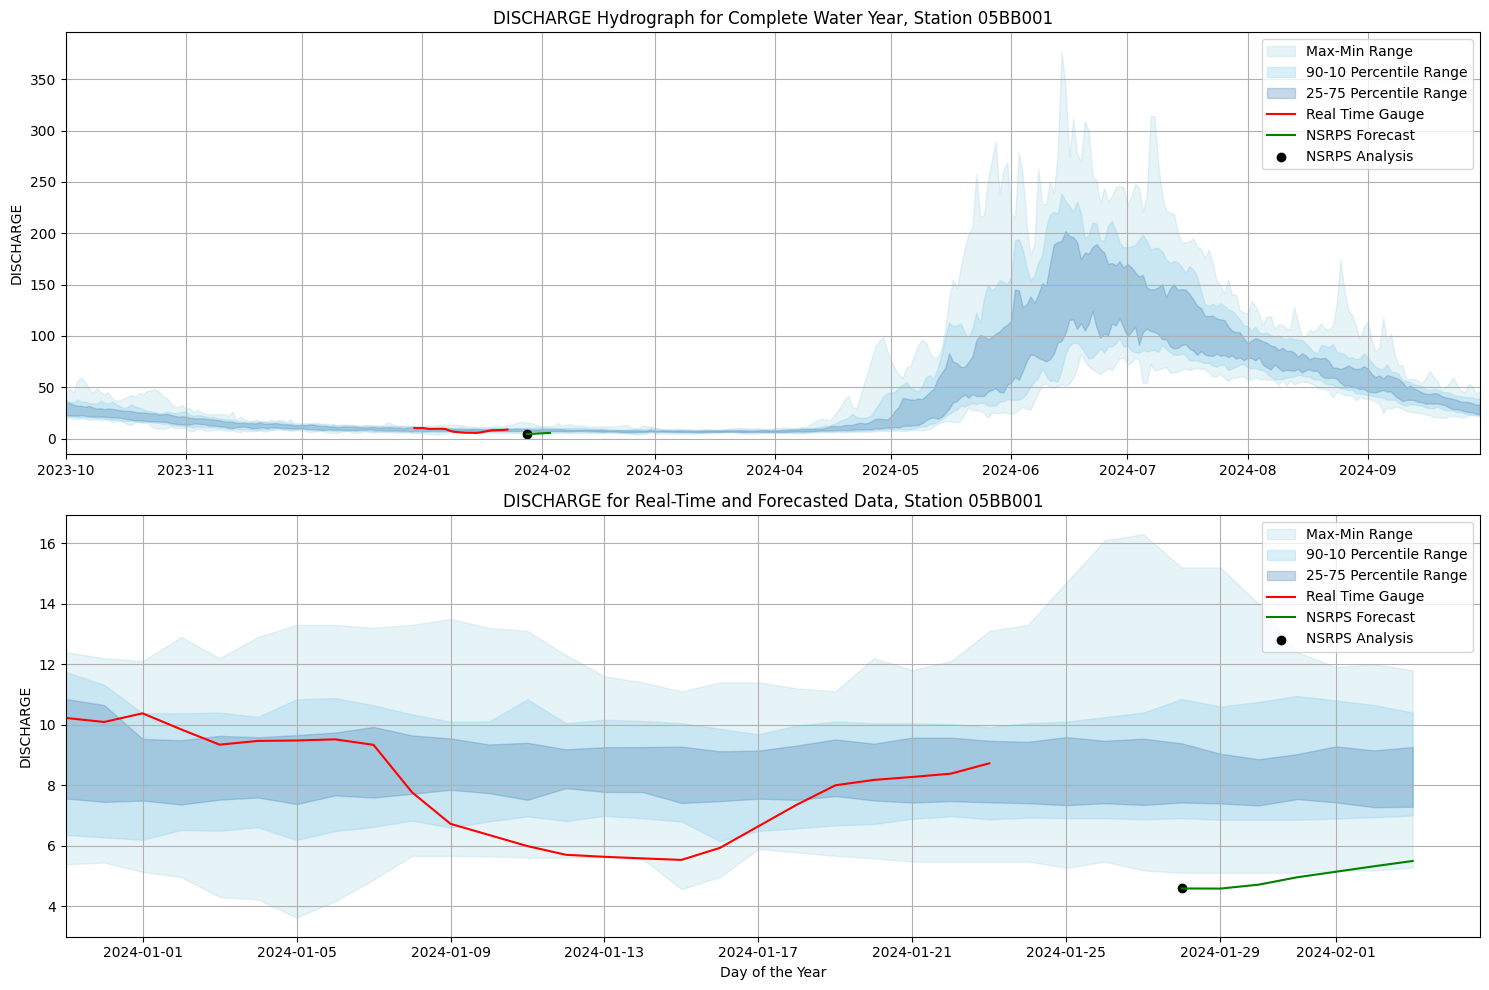

In [46]:
historic_df = pd.read_csv(Path(output_base_dir, f'hydrometric-daily-mean/{station}_{variable}.csv'))
realtime_df = pd.read_csv(Path(output_base_dir,f'hydrometric-realtime/{station}_{variable}.csv'))
forecast_df = pd.read_csv(Path(output_base_dir,f'DHPS_1km_RiverDischarge/{station}_forecast.csv'))
analysis_df = pd.read_csv(Path(output_base_dir,f'DHPS-Analysis_1km_RiverDischarge/{station}_analysis.csv'))

plot_detailed_hydrograph(station, variable, historic_df, realtime_df, forecast_df, analysis_df)

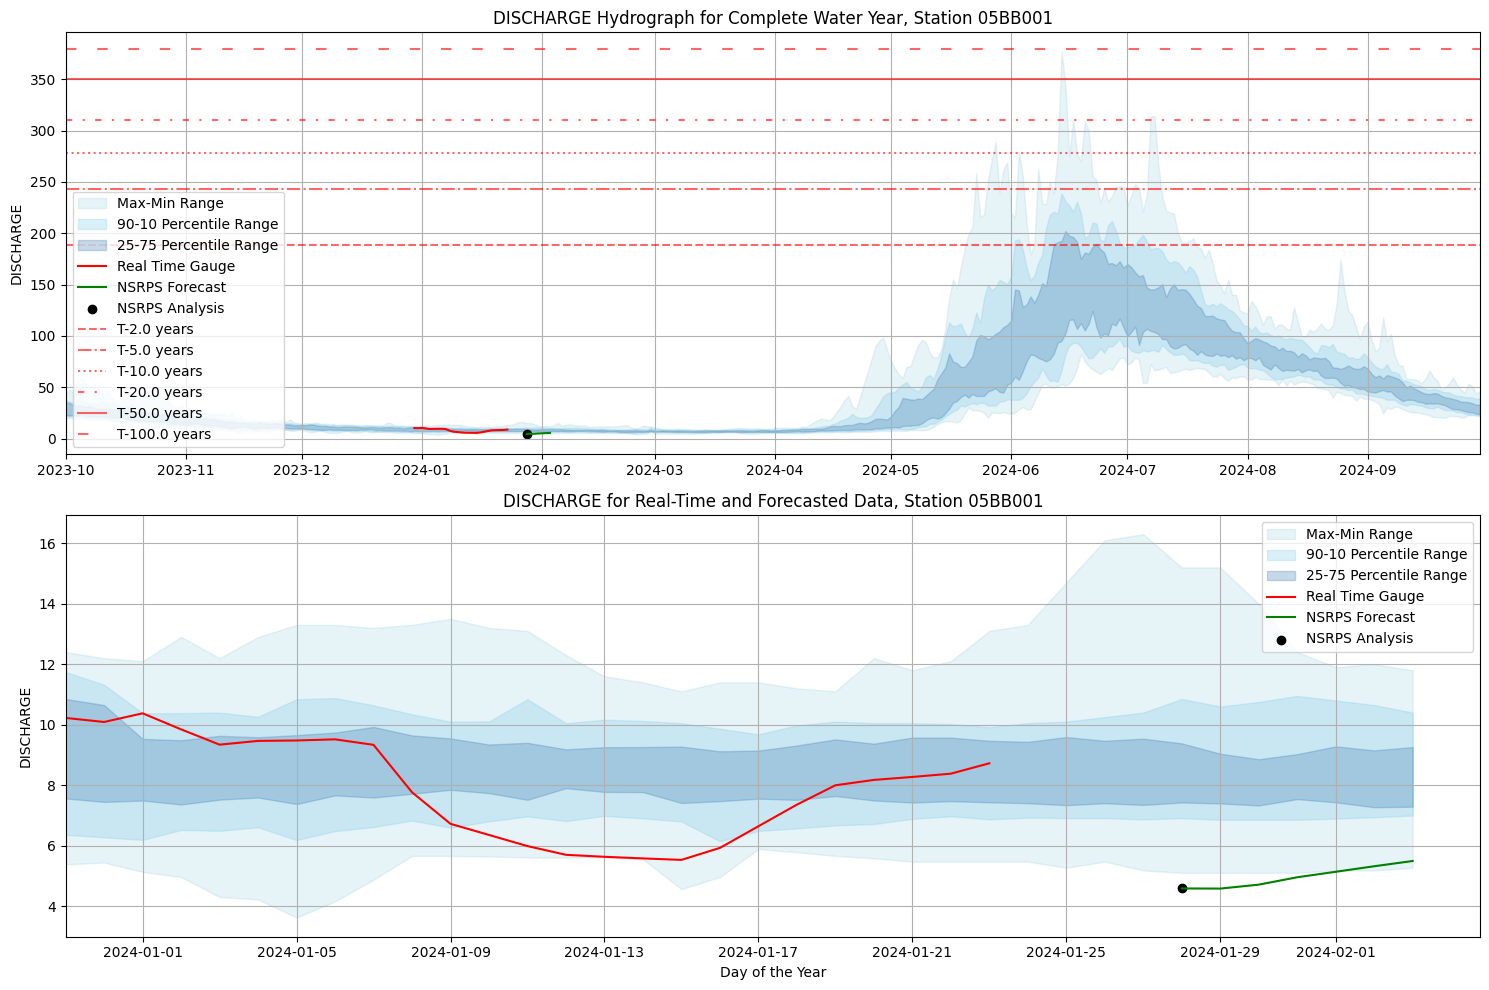

In [47]:
historic_df = pd.read_csv(Path(output_base_dir,f'hydrometric-daily-mean/{station}_{variable}.csv'))
realtime_df = pd.read_csv(Path(output_base_dir,f'hydrometric-realtime/{station}_{variable}.csv'))
forecast_df = pd.read_csv(Path(output_base_dir,f'DHPS_1km_RiverDischarge/{station}_forecast.csv'))
analysis_df = pd.read_csv(Path(output_base_dir,f'DHPS-Analysis_1km_RiverDischarge/{station}_analysis.csv'))
threshold_csv = Path(output_base_dir, f'FFA/{station}_threshold.csv').resolve()

if threshold_csv.exists(): 
    threshold_df = pd.read_csv(f'/Users/drc858/GitHub/ForecastFloodImpact/data_output/FFA/{station}_threshold.csv')
else:
    threshold_df=None

plot_detailed_hydrograph(station, variable, historic_df, realtime_df, forecast_df, analysis_df, threshold_df)

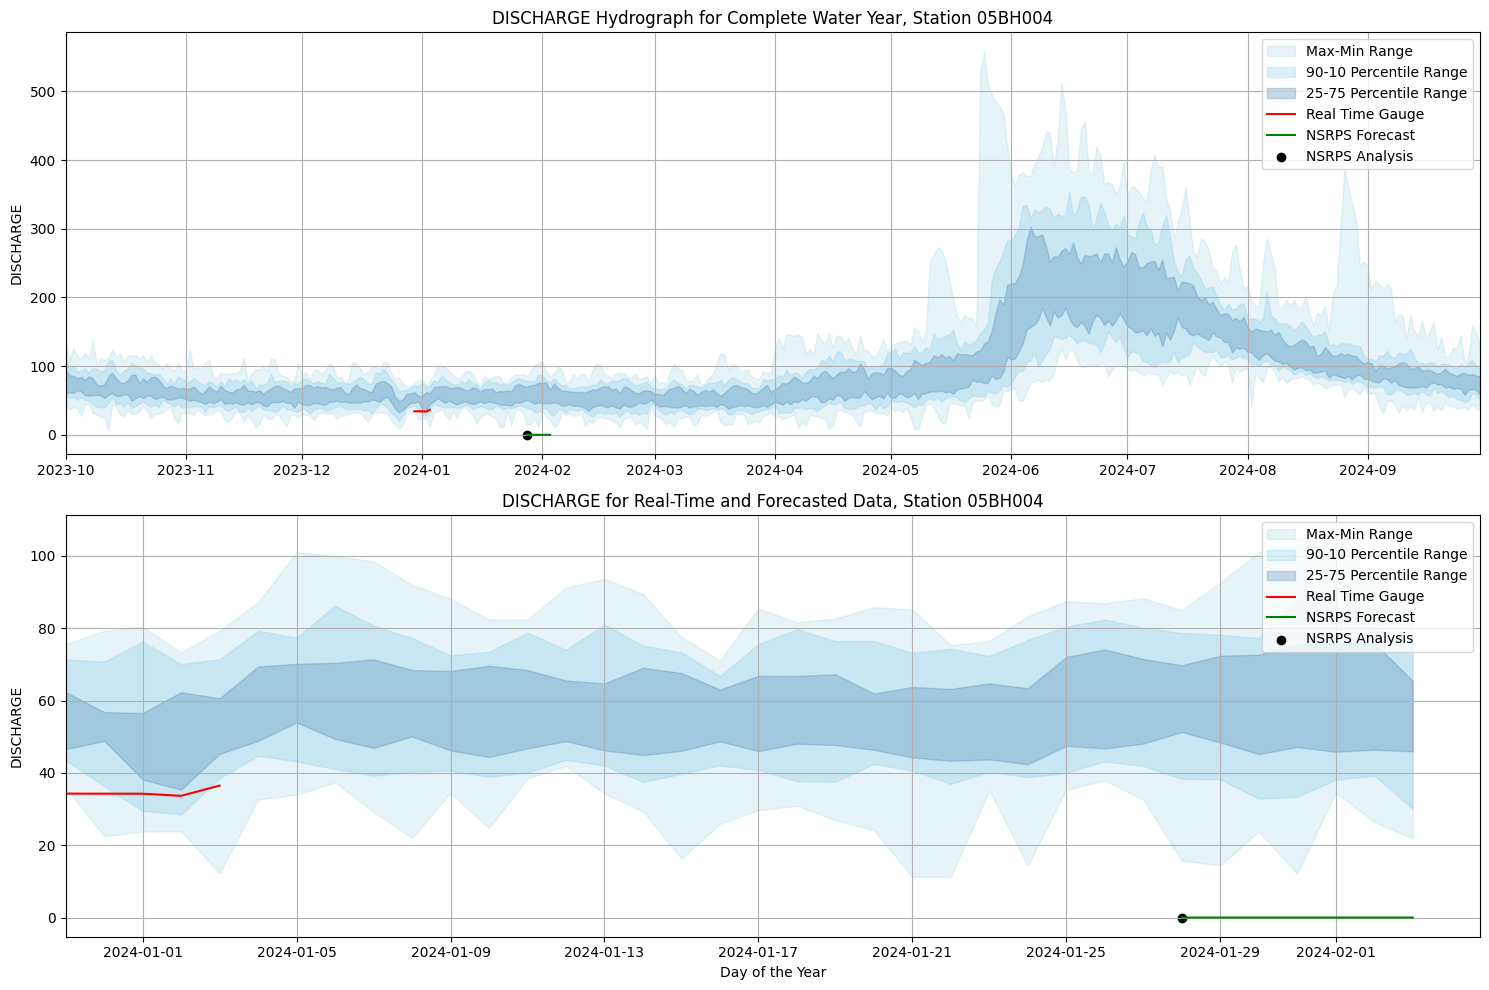

In [58]:
### Show a similar plot for water level

variable = 'DISCHARGE'
station = '05BH004'

historic_df = pd.read_csv(Path(output_base_dir, f'hydrometric-daily-mean/{station}_{variable}.csv'))
realtime_df = pd.read_csv(Path(output_base_dir,f'hydrometric-realtime/{station}_{variable}.csv'))
forecast_df = pd.read_csv(Path(output_base_dir,f'DHPS_1km_RiverDischarge/{station}_forecast.csv'))
analysis_df = pd.read_csv(Path(output_base_dir,f'DHPS-Analysis_1km_RiverDischarge/{station}_analysis.csv'))
threshold_csv = Path(output_base_dir, f'/FFA/{station}_threshold.csv')

if threshold_csv.exists(): 
    threshold_df = pd.read_csv(f'/Users/drc858/GitHub/ForecastFloodImpact/data_output/FFA/{station}_threshold.csv')
else:
    threshold_df=None

plot_detailed_hydrograph(station, variable, historic_df, realtime_df, forecast_df, analysis_df)